<a href="https://colab.research.google.com/github/cita-delta/DataScience/blob/main/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. EDA and transformation on application and record data
2. Vintage Analysis
3. Appropriate merging of the two datasets
4. Cleaning of unusable data
5. Application of ML



In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [ ]:
files.upload()

In [4]:
!rm -r ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [5]:
! mkdir ~/.kaggle

In [6]:
!mv ./kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [9]:
! kaggle datasets download -d rikdifos/credit-card-approval-prediction


  0% 0.00/5.32M [00:00<?, ?B/s]
100% 5.32M/5.32M [00:00<00:00, 69.7MB/s]


In [10]:
# import library
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
df_app = pd.read_csv('application_record[1].csv')
df_rec = pd.read_csv('credit_record[1].csv')

In [13]:
df_app.head(5)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [14]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [15]:
df_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [16]:
df_app.shape

(438557, 18)

In [17]:
df_rec.shape

(1048575, 3)

In [18]:
#number of unique IDs in application record
df_app['ID'].nunique()

438510

In [19]:
#number of unique IDs in credit record
df_rec['ID'].nunique()

45985

In [20]:
#number of shared IDs
len(set(df_app['ID']).intersection(set(df_rec['ID'])))

36457

Data sorting and cleaning.

In [21]:
#sort df by ID
df_app.sort_values(by=['ID'])

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423317,7999660,F,N,N,0,90000.0,State servant,Higher education,Single / not married,House / apartment,-13432,-5446,1,0,0,0,Core staff,1.0
426434,7999696,F,N,Y,2,135000.0,State servant,Secondary / secondary special,Married,House / apartment,-12576,-4382,1,0,0,0,Medicine staff,4.0
432885,7999738,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-9970,-119,1,0,0,0,NaN,2.0
421225,7999784,F,Y,Y,1,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10630,-454,1,0,0,0,NaN,3.0


There is data missing for occupation_type.

In [22]:
#check for missing data
df_app.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

There is duplicates in ID.

In [23]:
#check for duplicates
df_app['ID'].duplicated().any()

True

In [24]:
#drop duplicate ID and keep the last
df_app = df_app.drop_duplicates('ID', keep='last') 

Change Yes, No, Male, Female into binary values.

In [25]:
# Convert male, female, yes, no into binary values
df_app2 = df_app.replace(to_replace = ["Y", "N", "M", "F"],
                           value = [1, 0, 0, 1])

In [26]:
df_app2.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


Education Type is an ordinal variable. 

In [27]:
df_app2['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64

In [28]:
#assign values to education type
df_app3 = df_app2.replace(to_replace = ["Secondary / secondary special", "Higher education", "Incomplete higher", "Lower secondary", "Academic degree"],
                           value = [1, 3, 2, 0, 4])

In [29]:
df_app3['NAME_HOUSING_TYPE'].value_counts()

House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

In [30]:
#assign values to housing types
df_app4 = df_app3.replace(to_replace = ["With parents", "Municipal apartment", "Rented apartment", "Office apartment", "Co-op apartment", "House / apartment"],
                           value = [0, 1, 2, 3, 4, 5])

1.   Commercial Associate 51k
2.   State Servant 44k
3.   Pension 30k
4.   Worker 34k





In [31]:
#assign values to income type
df_app5 = df_app4.replace(to_replace = ["Student", "Pensioner", "Working", "State servant", "Commercial associate"],
                           value = [0, 1, 2, 3, 4])

In [32]:
df_app5['OCCUPATION_TYPE'].value_counts()

Laborers                 78234
Core staff               43000
Sales staff              41096
Managers                 35483
Drivers                  26085
High skill tech staff    17287
Accountants              15982
Medicine staff           13520
Cooking staff             8074
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

Given that there is quite a few occupation types that are difficult to be ordered properely, they will be one-hot encoded.

In [33]:
#create seperate columns with binary values for each occupation type
df_app6 = pd.get_dummies(df_app5, columns=['OCCUPATION_TYPE'], prefix=['OCCUPATION_TYPE'])

In [34]:
#assign values to family status
df_app7 = df_app6.replace(to_replace = ["Widow", "Separated", "Single / not married", "Civil marriage", "Married"],
                           value = [0, 1, 2, 3, 3])

In [35]:
#check whether all data types are numerical
df_app7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 35 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   ID                                     438510 non-null  int64  
 1   CODE_GENDER                            438510 non-null  int64  
 2   FLAG_OWN_CAR                           438510 non-null  int64  
 3   FLAG_OWN_REALTY                        438510 non-null  int64  
 4   CNT_CHILDREN                           438510 non-null  int64  
 5   AMT_INCOME_TOTAL                       438510 non-null  float64
 6   NAME_INCOME_TYPE                       438510 non-null  int64  
 7   NAME_EDUCATION_TYPE                    438510 non-null  int64  
 8   NAME_FAMILY_STATUS                     438510 non-null  int64  
 9   NAME_HOUSING_TYPE                      438510 non-null  int64  
 10  DAYS_BIRTH                             438510 non-null  

In [36]:
#convert days since birth into years
df_app7['DAYS_BIRTH'] = pd.to_numeric(df_app7['DAYS_BIRTH']/(-365), downcast='float')

In [37]:
#round years
df_app7['DAYS_BIRTH'] = df_app7['DAYS_BIRTH'].round(decimals = 0)

In [38]:
#check for outliers
df_app7['DAYS_BIRTH'].value_counts()

39.0    13961
40.0    13224
42.0    12948
28.0    12844
38.0    12792
32.0    12731
41.0    12721
43.0    12653
37.0    12499
30.0    12408
36.0    12396
35.0    12238
44.0    12112
29.0    12048
33.0    12011
34.0    11894
31.0    11331
46.0    10632
45.0    10582
54.0    10391
47.0    10283
48.0    10026
52.0     9953
53.0     9881
55.0     9824
60.0     9771
49.0     9761
57.0     9730
51.0     9669
50.0     9531
58.0     9322
59.0     9198
56.0     8987
27.0     8971
61.0     8221
63.0     7779
62.0     7582
64.0     6889
65.0     5710
26.0     5408
25.0     4524
24.0     3590
23.0     3349
66.0     2451
67.0     1595
22.0     1048
68.0      949
69.0       62
21.0       30
Name: DAYS_BIRTH, dtype: int64

In [39]:
df_app6['DAYS_EMPLOYED'].value_counts()

 365243    75319
-218         262
-1678        251
-249         241
-978         240
           ...  
-13529         1
-10223         1
-8917          1
-11429         1
-8105          1
Name: DAYS_EMPLOYED, Length: 9406, dtype: int64

In [40]:
#convert days employed into years
df_app7['DAYS_EMPLOYED'] = df_app7['DAYS_EMPLOYED']/365

In [41]:
#check for oddities
df_app7['DAYS_EMPLOYED'].sort_values(ascending = True)

102187     -48.030137
102190     -48.030137
102188     -48.030137
102189     -48.030137
102185     -48.030137
             ...     
307094    1000.665753
307095    1000.665753
307096    1000.665753
307081    1000.665753
243005    1000.665753
Name: DAYS_EMPLOYED, Length: 438510, dtype: float64

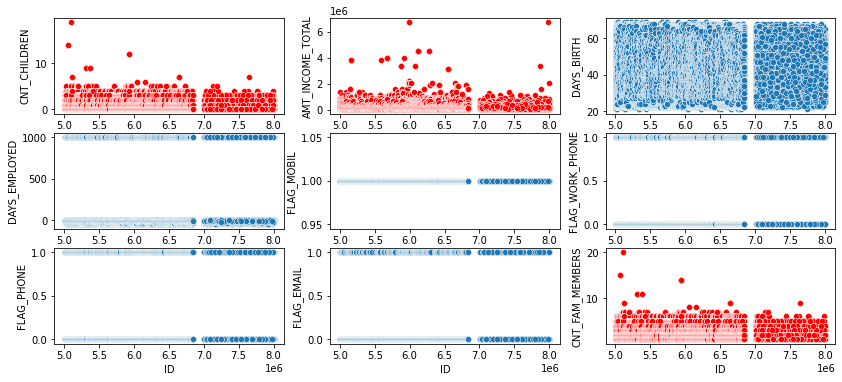

In [42]:
#create scatterplots to check for outliers
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=df_app7, ax=ax[0][0], color= 'red')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=df_app7, ax=ax[0][1], color='red')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=df_app7, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=df_app7, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=df_app7, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=df_app7, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=df_app7, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=df_app7, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=df_app7, ax=ax[2][2], color= 'red')

There are outliers in the children count, income and family members count. 

In [43]:
#fix outliers for children count
q_hi = df_app7['CNT_CHILDREN'].quantile(0.999)
q_low = df_app7['CNT_CHILDREN'].quantile(0.001)
df_app7 = df_app7[(df_app7['CNT_CHILDREN']>q_low) & (df_app7['CNT_CHILDREN']<q_hi)]

In [44]:
#fix outliers for income
q_hi = df_app7['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = df_app7['AMT_INCOME_TOTAL'].quantile(0.001)
df_app7 = df_app7[(df_app7['AMT_INCOME_TOTAL']>q_low) & (df_app7['CNT_CHILDREN']<q_hi)]

In [45]:
#fix outliers for family members
q_hi = df_app7['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = df_app7['CNT_FAM_MEMBERS'].quantile(0.001)
df_app7 = df_app7[(df_app7['CNT_FAM_MEMBERS']>q_low) & (df_app7['CNT_CHILDREN']<q_hi)]

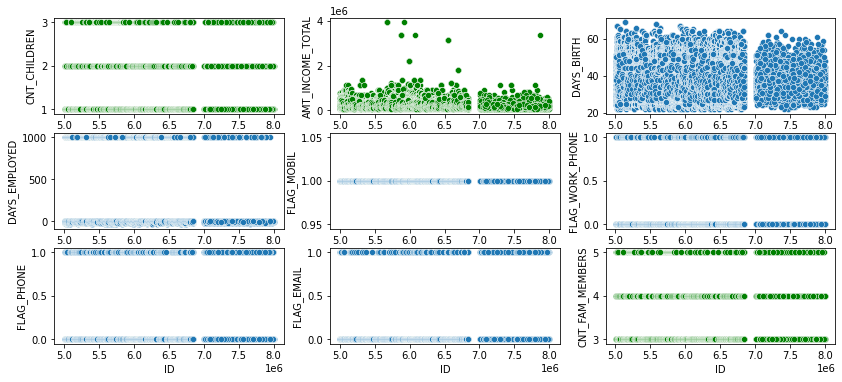

In [46]:
#check again scatterplots with adjusted data
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=df_app7, ax=ax[0][0], color= 'green')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=df_app7, ax=ax[0][1], color='green')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=df_app7, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=df_app7, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=df_app7, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=df_app7, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=df_app7, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=df_app7, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=df_app7, ax=ax[2][2], color= 'green')

In [47]:
#just for personal reasons
#sns.set(rc = {'figure.figsize':(15,8)})
#sns.countplot(x='AMT_INCOME_TOTAL', data=df_app7)

Application data is cleaned, next is record data:

In [48]:
df_rec.sort_values(by=['ID'])

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
22,5001712,-18,0
...,...,...,...
1048547,5150487,-2,C
1048546,5150487,-1,C
1048545,5150487,0,C
1048558,5150487,-13,C


In [49]:
df_rec.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [50]:
df_rec['MONTHS_BALANCE'].value_counts()

-1     34436
-2     34209
 0     33856
-3     33854
-4     33365
       ...  
-56     2109
-57     1649
-58     1255
-59      820
-60      415
Name: MONTHS_BALANCE, Length: 61, dtype: int64

In [51]:
df_rec['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

1 will refer to a bad customer and 0 to a good customer. 

A bad customer is a customer who defaulted in payment. (Payment due more than 90 days)

Intermediates are customer whose payment is due 30 or max 60 days but is paid after that. They will not be included as it would reduce the discrimination ability to distinguish between good and bad. 

The other customer are good customer. 


Approach:

- bad customer df = df where status is 2, 3, 4, 5
- drop duplicate ID from there
- drop rows from df where status is 0, 1 (intermediates)
- drop ID where Months Balance is less than 12
- good customer df = this df



In [52]:
#drop all rows that are C, X, 0, 1
df_bc = df_rec.drop(df_rec[df_rec['STATUS'].isin(["C", "X", "0", "1"])].index)

In [53]:
#drop duplicate IDs but keep one instance
df_bc = df_bc.drop_duplicates(subset=['ID'], keep='last')

In [54]:
df_bc.MONTHS_BALANCE.value_counts()

-3     24
-5     22
-18    18
-34    18
-19    17
-9     17
-21    16
-6     16
-27    16
-41    16
-14    16
-2     16
-31    15
-38    15
-4     15
-44    15
-8     15
-1     15
-26    14
-15    14
-11    13
-50    13
-28    13
-30    12
-24    12
-37    12
-42    12
-13    11
 0     11
-40    11
-10    11
-25    11
-23    11
-22    11
-49    10
-17    10
-47    10
-39    10
-45    10
-7     10
-16     9
-43     9
-48     9
-51     9
-20     9
-46     9
-33     8
-12     8
-36     8
-29     7
-53     6
-35     6
-52     6
-32     5
-54     2
-56     2
-55     1
Name: MONTHS_BALANCE, dtype: int64

In [55]:
#create a df for good custoemr by dropping all values from status that are not C and X
df_gc = df_rec.drop(df_rec[df_rec['STATUS'].isin(["0", "1", "2", "3", "4", "5"])].index)

In [56]:
#keep only entries older than 11 months
df_gc2 = df_gc[df_gc.MONTHS_BALANCE < -11]

In [57]:
#remove duplicate IDs
df_gc3 = df_gc2.drop_duplicates(subset=['ID'], keep='last')

In [58]:
df_gc3.MONTHS_BALANCE.value_counts()

-17    938
-13    914
-12    887
-16    863
-18    828
-15    815
-21    807
-20    803
-23    792
-14    786
-19    765
-24    757
-22    757
-26    739
-25    735
-28    729
-30    714
-35    688
-27    684
-33    676
-31    668
-39    648
-32    643
-29    642
-36    631
-34    627
-38    625
-40    596
-37    589
-41    584
-42    550
-43    523
-44    496
-45    482
-46    470
-47    449
-48    436
-51    405
-50    398
-49    395
-52    366
-53    308
-54    302
-55    262
-56    256
-57    213
-58    205
-59    185
-60    185
Name: MONTHS_BALANCE, dtype: int64

Now there is of course a problem. We have 28816 good customer but only 667 bad customer and we are therefore dealing with a hugely imbalanced dataset. 

First we need to add the label to the application dataset. We will approach this way:

- create extra column called label in application df
- if ID of df_app appears in df_bc/df_gc: add 1/0 to respective label entry

In [59]:
df_app0 = df_app7

In [60]:
#add column label with 2 as entries
df_app0['label'] = 2

In [61]:
#replace the label entry with 0 (good customer) if ID in said row appears in the good custoemr dataset
df_app0.loc[df_app0['ID'].isin(df_gc3['ID']), 'label'] = 0

In [62]:
#analogous for bad customer 
df_app0.loc[df_app0['ID'].isin(df_bc['ID']), 'label'] = 1

In [63]:
df_app0.label.value_counts()

2    113080
0      6092
1       163
Name: label, dtype: int64

In [64]:
df_app0['label'].value_counts()

2    113080
0      6092
1       163
Name: label, dtype: int64

In [65]:
len(set(df_app7['ID']).intersection(set(df_bc['ID'])))

163

In [66]:
len(set(df_app7['ID']).intersection(set(df_gc3['ID'])))

6200

In [67]:
df_app7['ID'].duplicated().any()

False

In [68]:
df_gc3['ID'].duplicated().any()

False

In [69]:
#number of shared IDs
len(set(df_app['ID']).intersection(set(df_rec['ID'])))

36457

In [70]:
df_app0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119335 entries, 27 to 438548
Data columns (total 36 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   ID                                     119335 non-null  int64  
 1   CODE_GENDER                            119335 non-null  int64  
 2   FLAG_OWN_CAR                           119335 non-null  int64  
 3   FLAG_OWN_REALTY                        119335 non-null  int64  
 4   CNT_CHILDREN                           119335 non-null  int64  
 5   AMT_INCOME_TOTAL                       119335 non-null  float64
 6   NAME_INCOME_TYPE                       119335 non-null  int64  
 7   NAME_EDUCATION_TYPE                    119335 non-null  int64  
 8   NAME_FAMILY_STATUS                     119335 non-null  int64  
 9   NAME_HOUSING_TYPE                      119335 non-null  int64  
 10  DAYS_BIRTH                             119335 non-null 

make a heatmap for labeled rows

In [71]:
df_hm = df_app0.drop(df_app0[df_app0['label'].isin([2])].index)

In [72]:
df_hm

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,label
27,5008836,0,1,1,3,270000.0,2,1,3,5,...,0,0,0,0,0,0,0,0,0,0
28,5008837,0,1,1,3,270000.0,2,1,3,5,...,0,0,0,0,0,0,0,0,0,0
29,5008838,0,0,1,1,405000.0,4,3,3,5,...,0,1,0,0,0,0,0,0,0,0
31,5008840,0,0,1,1,405000.0,4,3,3,5,...,0,1,0,0,0,0,0,0,0,0
34,5008843,0,0,1,1,405000.0,4,3,3,5,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434779,5142964,0,0,0,1,180000.0,2,1,3,5,...,0,0,0,0,0,0,0,0,0,1
434780,5142972,0,0,0,1,180000.0,2,1,2,5,...,0,0,0,0,0,0,0,0,0,1
434782,5143342,0,0,0,1,216000.0,2,1,3,1,...,0,0,0,0,0,0,0,0,0,1
434791,5145846,1,0,1,1,256500.0,3,3,3,5,...,0,1,0,0,0,0,0,0,0,1


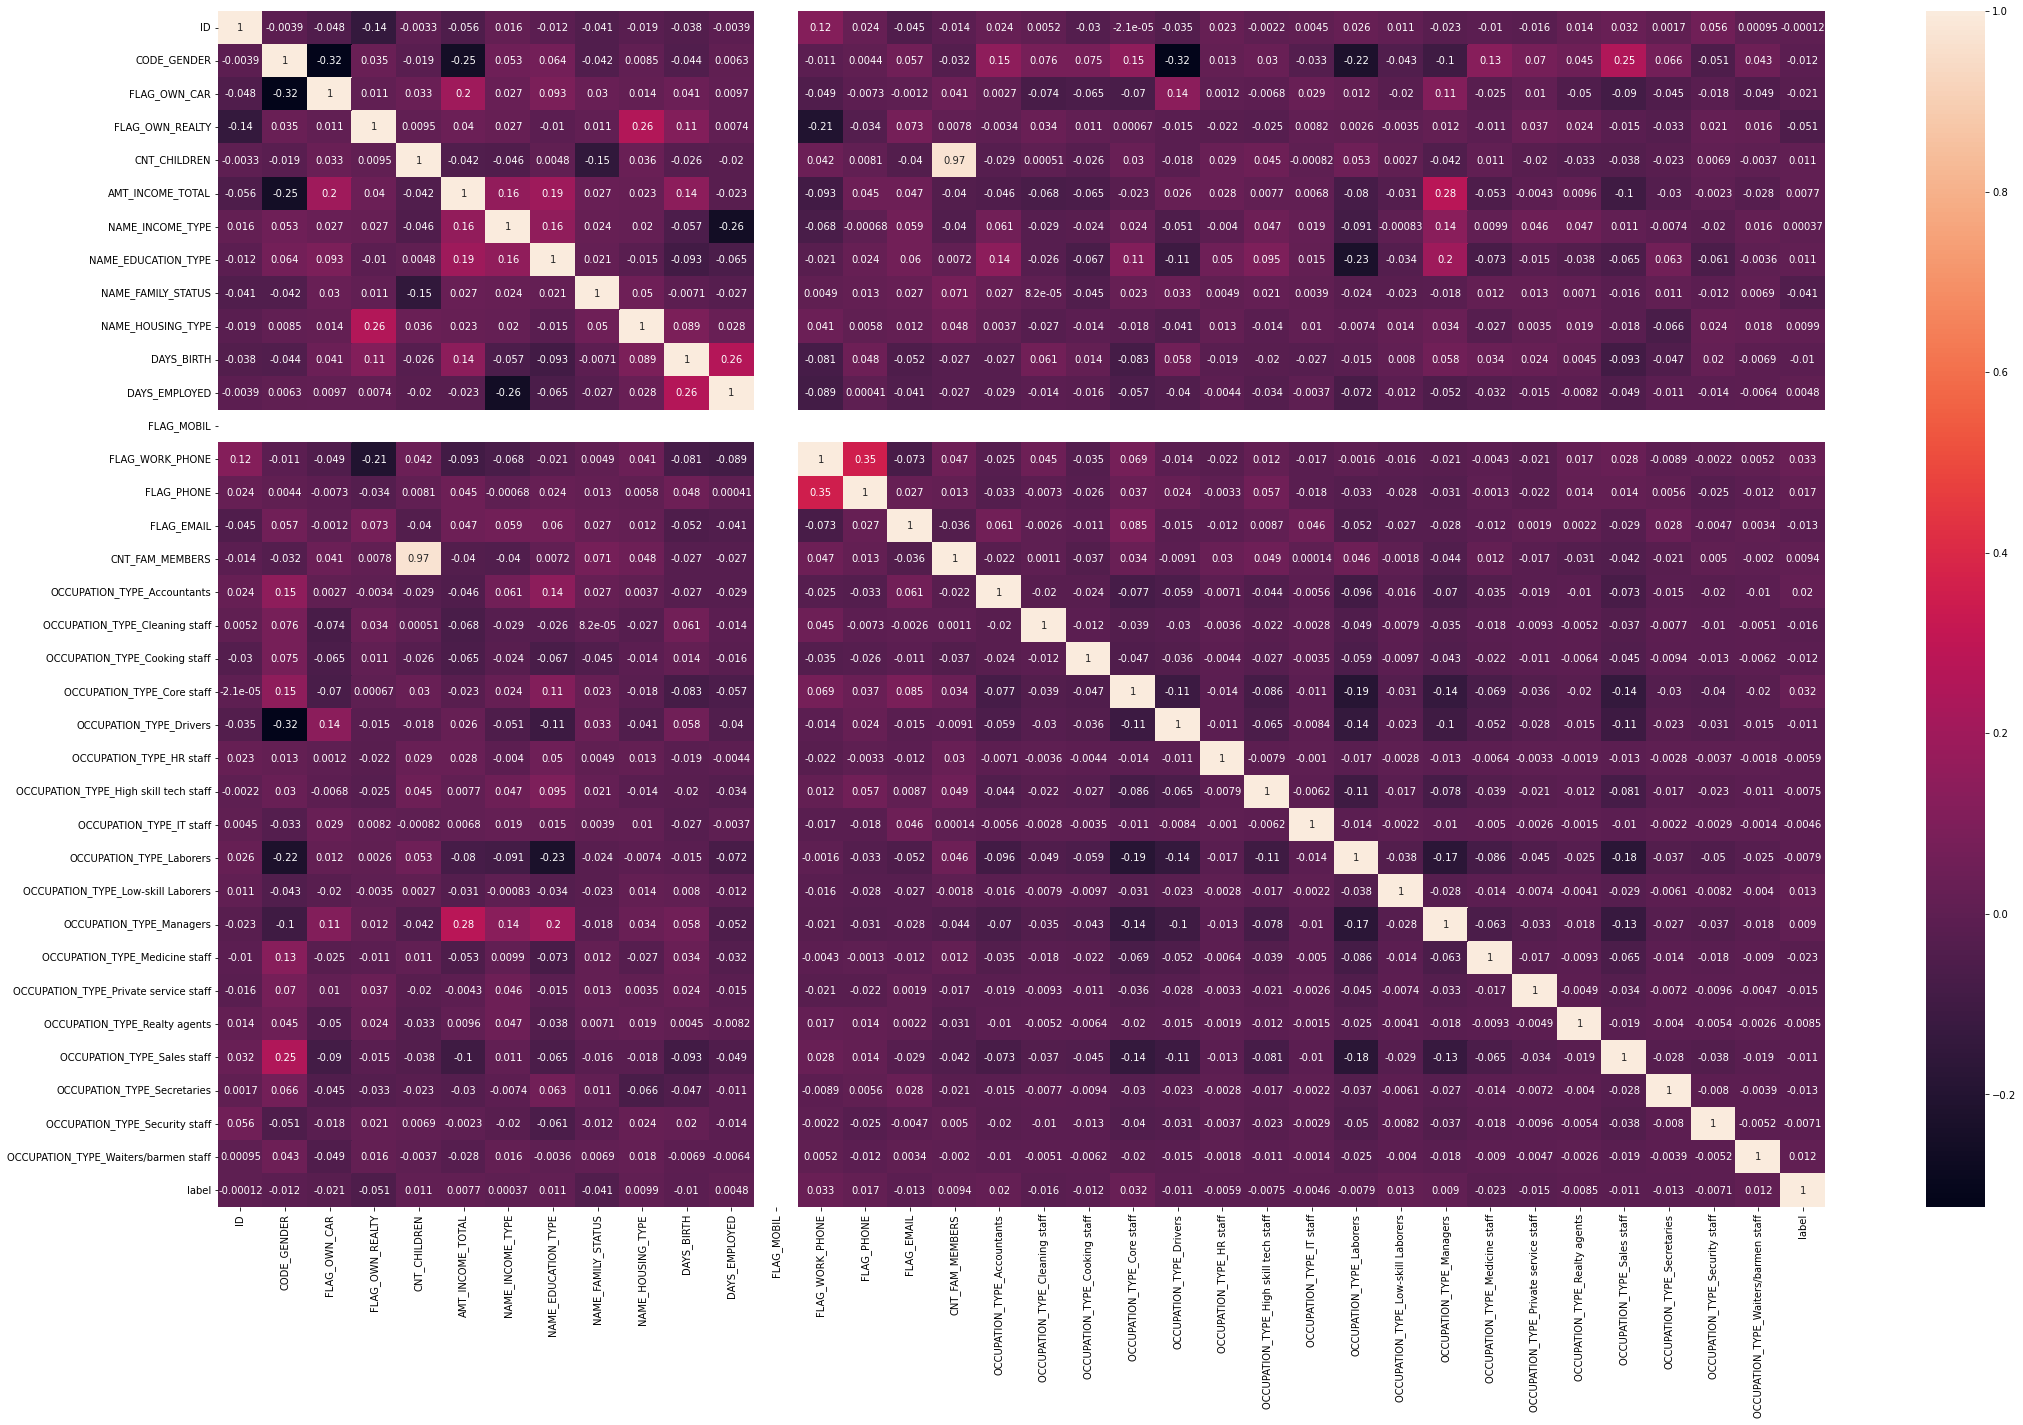

In [73]:
plt.figure(figsize=(36, 22))
ax = sns.heatmap(df_hm.corr(), annot=True)

In [74]:
#remove columns that do not meaningfully correlate with label
df_hm1 = df_hm.drop(columns=['ID', 'NAME_INCOME_TYPE', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE_HR staff','OCCUPATION_TYPE_High skill tech staff', 'OCCUPATION_TYPE_Laborers', 'OCCUPATION_TYPE_Realty agents', 'OCCUPATION_TYPE_Security staff',])

In [75]:
#remove columns that correlate with each other
df_hm2 = df_hm1.drop(columns=['FLAG_MOBIL', 'FLAG_PHONE', 'CNT_CHILDREN' ])

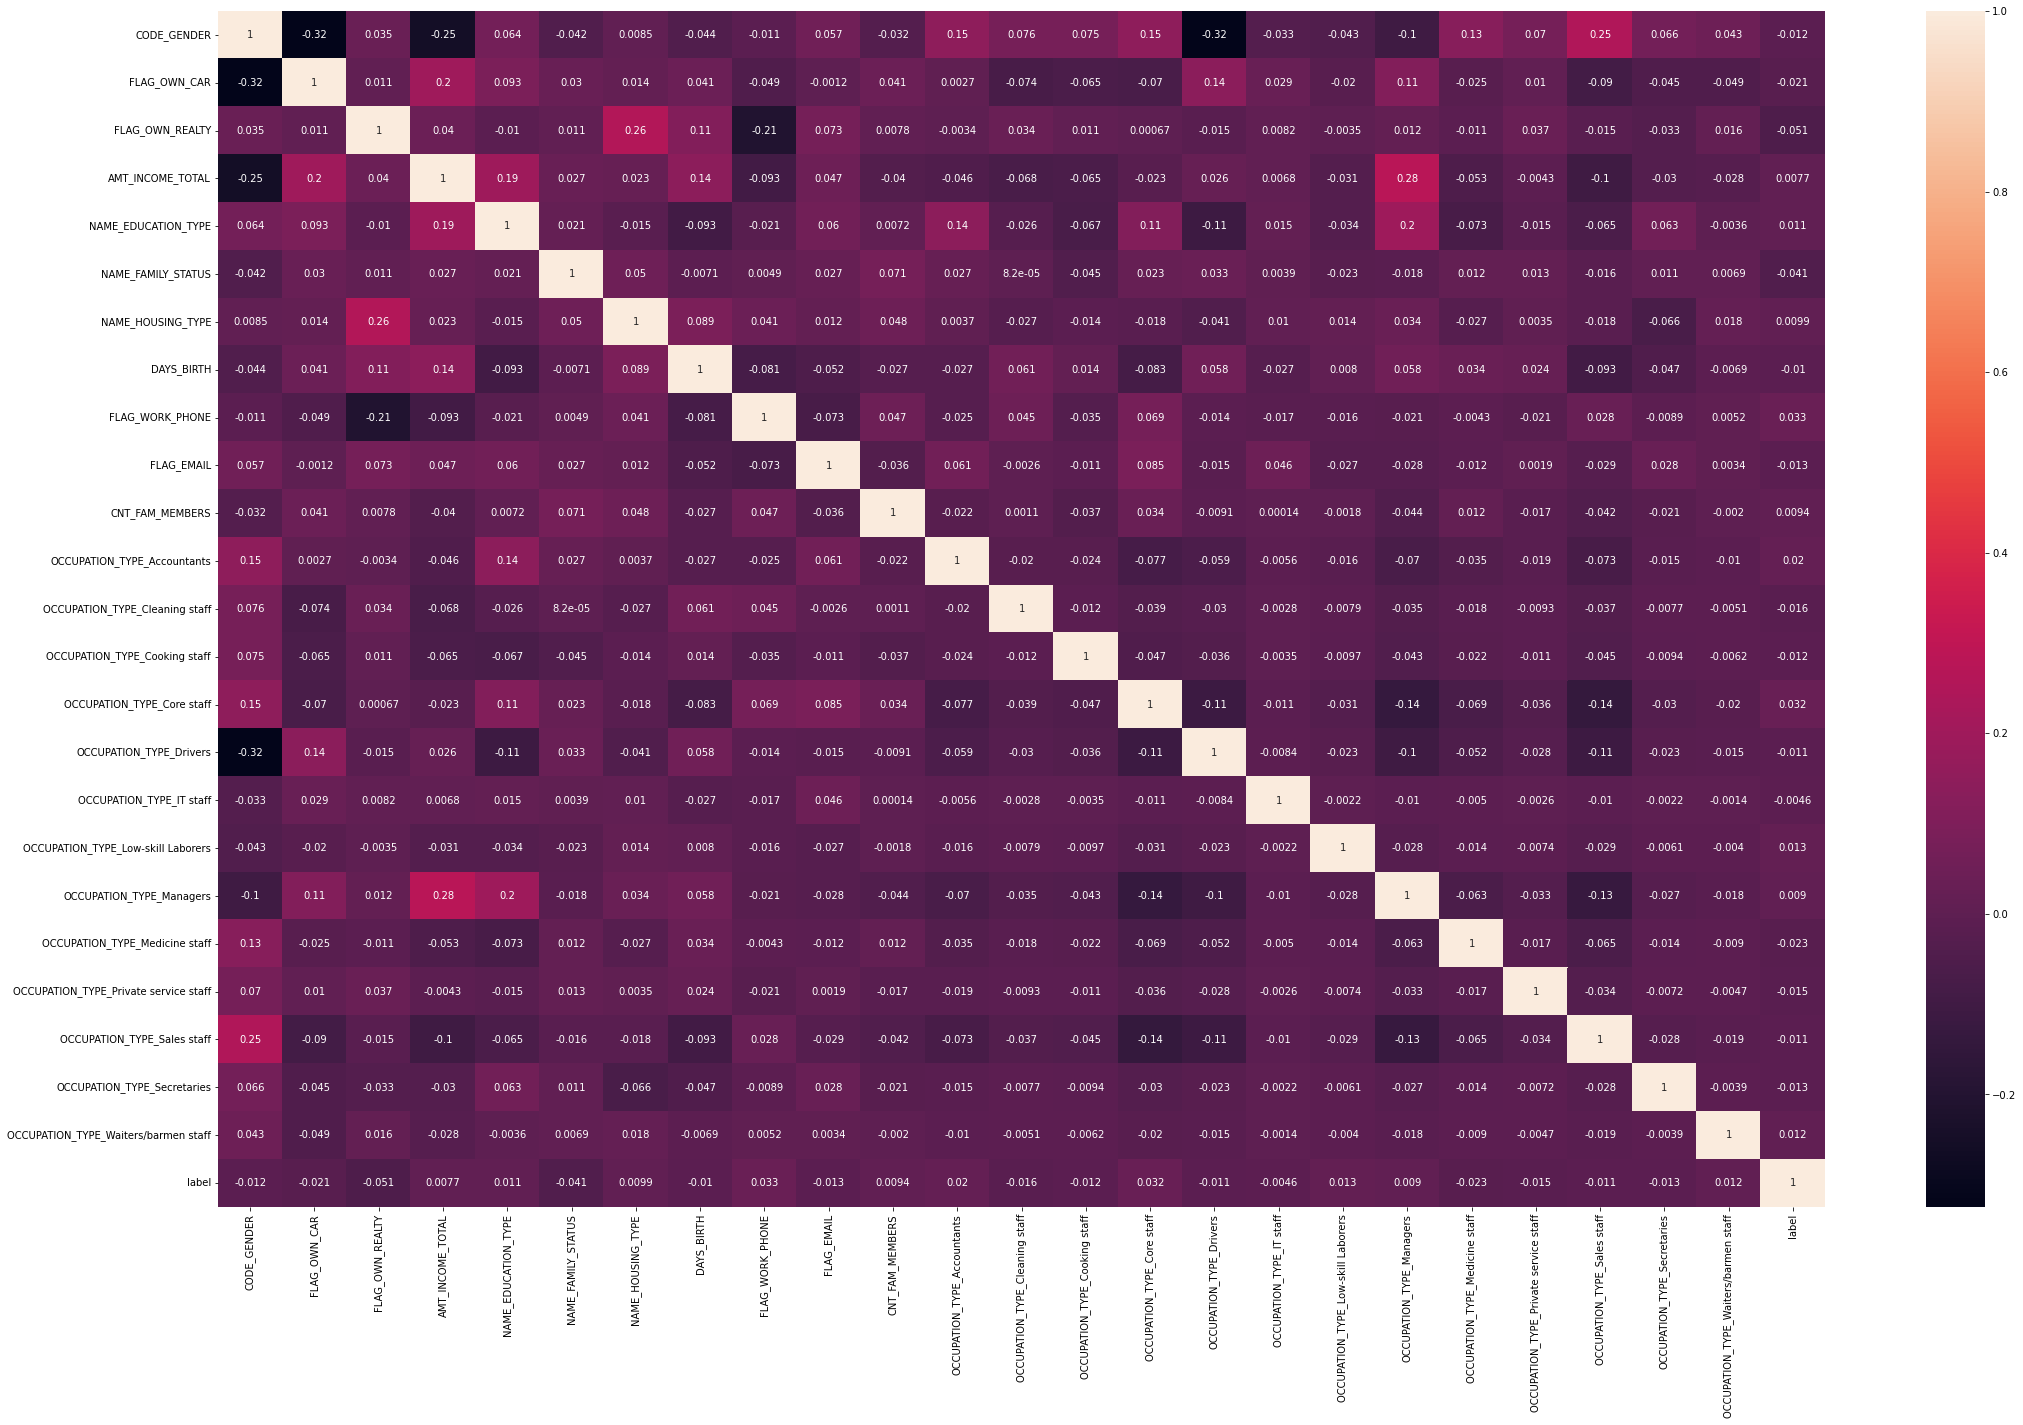

In [76]:
plt.figure(figsize=(36, 22))
ax = sns.heatmap(df_hm2.corr(), annot=True)

We are dealing with an imbalanced datset and even worse, given the tiny dataset we are prone to overfitting.

In [77]:
df_hm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6255 entries, 27 to 434805
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CODE_GENDER                            6255 non-null   int64  
 1   FLAG_OWN_CAR                           6255 non-null   int64  
 2   FLAG_OWN_REALTY                        6255 non-null   int64  
 3   AMT_INCOME_TOTAL                       6255 non-null   float64
 4   NAME_EDUCATION_TYPE                    6255 non-null   int64  
 5   NAME_FAMILY_STATUS                     6255 non-null   int64  
 6   NAME_HOUSING_TYPE                      6255 non-null   int64  
 7   DAYS_BIRTH                             6255 non-null   float32
 8   FLAG_WORK_PHONE                        6255 non-null   int64  
 9   FLAG_EMAIL                             6255 non-null   int64  
 10  CNT_FAM_MEMBERS                        6255 non-null   float64
 11  O

In [78]:
#create copy of dataframe and transform int to bool
df_new = df_hm2.copy()                                 
df_new['label'] = df_new['label'].astype(bool)          
df_new.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6255 entries, 27 to 434805
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CODE_GENDER                            6255 non-null   int64  
 1   FLAG_OWN_CAR                           6255 non-null   int64  
 2   FLAG_OWN_REALTY                        6255 non-null   int64  
 3   AMT_INCOME_TOTAL                       6255 non-null   float64
 4   NAME_EDUCATION_TYPE                    6255 non-null   int64  
 5   NAME_FAMILY_STATUS                     6255 non-null   int64  
 6   NAME_HOUSING_TYPE                      6255 non-null   int64  
 7   DAYS_BIRTH                             6255 non-null   float32
 8   FLAG_WORK_PHONE                        6255 non-null   int64  
 9   FLAG_EMAIL                             6255 non-null   int64  
 10  CNT_FAM_MEMBERS                        6255 non-null   float64
 11  O

In [79]:
#define features and labels
features = df_hm2[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS','OCCUPATION_TYPE_Accountants', 'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff','OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers', 'OCCUPATION_TYPE_IT staff','OCCUPATION_TYPE_Low-skill Laborers', 'OCCUPATION_TYPE_Managers', 'OCCUPATION_TYPE_Medicine staff','OCCUPATION_TYPE_Private service staff', 'OCCUPATION_TYPE_Sales staff', 'OCCUPATION_TYPE_Secretaries','OCCUPATION_TYPE_Waiters/barmen staff']]
labels =  df_new.drop(columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS','OCCUPATION_TYPE_Accountants', 'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff','OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers', 'OCCUPATION_TYPE_IT staff','OCCUPATION_TYPE_Low-skill Laborers', 'OCCUPATION_TYPE_Managers', 'OCCUPATION_TYPE_Medicine staff','OCCUPATION_TYPE_Private service staff', 'OCCUPATION_TYPE_Sales staff', 'OCCUPATION_TYPE_Secretaries','OCCUPATION_TYPE_Waiters/barmen staff'])

In [80]:
#shuffle rows since they were ordered with respect to 'label'
Y = labels.sample(frac=1)
X = features.sample(frac=1)

In [81]:
#hugely imbalanced dataset
Y.value_counts()

label
False    6092
True      163
dtype: int64

We will use Synthetic Minority Over-Sampling Technique (SMOTE) to overcome the sample imbalance problem. 

In [82]:
#apply smote to oversample
Y = Y.astype('int')
X_balance, Y_balance = SMOTE().fit_resample(X,Y)
X_balance = pd.DataFrame(X_balance, columns = X.columns)

In [83]:
#check for balance
Y_balance.value_counts()

label
0        6092
1        6092
dtype: int64

In [84]:
#define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balance, Y_balance, 
                                                    stratify = Y_balance, train_size=0.8)

We want to avoid complex models with many parameters to limit generalization and therefore the possibility of overfitting. A good start is Logistic Regression.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score is 0.78744
     0     1
0  856   363
1  155  1063
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1219
           1       0.75      0.87      0.80      1218

    accuracy                           0.79      2437
   macro avg       0.80      0.79      0.79      2437
weighted avg       0.80      0.79      0.79      2437



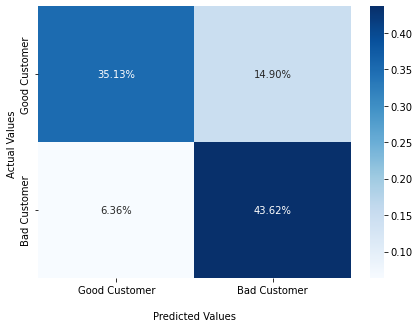

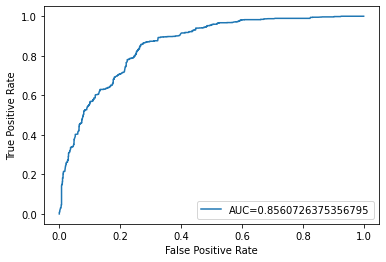

In [85]:
#testing with penalty and lowering of C parameter to specify stronger regularization
model = LogisticRegression(C=0.1, penalty='l1',
                           random_state=0,
                           solver='liblinear') #for small datasets

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

# give precision/recall/f1-score
print(classification_report(y_test, y_predict))

#plot confusion matrix
cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Good Customer','Bad Customer'])
ax.yaxis.set_ticklabels(['Good Customer','Bad Customer'])

plt.show()

#ROC-Curve plot with AUC
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score is 0.87197
      0     1
0  1057   162
1   150  1068
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1219
           1       0.87      0.88      0.87      1218

    accuracy                           0.87      2437
   macro avg       0.87      0.87      0.87      2437
weighted avg       0.87      0.87      0.87      2437



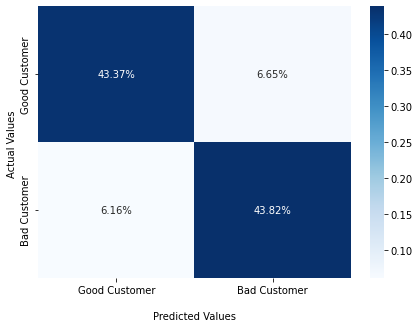

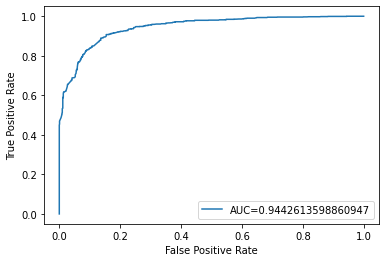

In [86]:
#use tree based model XGBoost. overfitting is controlled by tuning parameters. 
model = XGBClassifier(
    max_depth=2, #restrict max depth
    gamma=2, #make model more conservative
    eta=0.8, #make model more conservative
    reg_alpha=0.5, #L1 and L2 regularization
    reg_lambda=0.5 #L1 and L2 regularization
)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

# give precision/recall/f1-score
print(classification_report(y_test, y_predict))

#plot confusion matrix
cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Good Customer','Bad Customer'])
ax.yaxis.set_ticklabels(['Good Customer','Bad Customer'])

plt.show()

#ROC-Curve plot with AUC
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Accuracy Score is 0.89783
      0     1
0  1080   139
1   110  1108
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1219
           1       0.89      0.91      0.90      1218

    accuracy                           0.90      2437
   macro avg       0.90      0.90      0.90      2437
weighted avg       0.90      0.90      0.90      2437



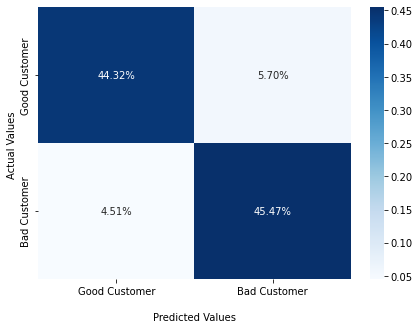

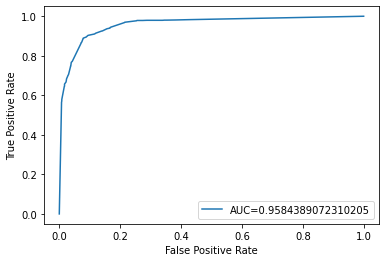

In [87]:
#use DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

# give precision/recall/f1-score
print(classification_report(y_test, y_predict))

#plot confusion matrix
cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Good Customer','Bad Customer'])
ax.yaxis.set_ticklabels(['Good Customer','Bad Customer'])

plt.show()

#ROC-Curve plot with AUC
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Accuracy Score is 0.88716
      0     1
0  1062   157
1   118  1100
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1219
           1       0.88      0.90      0.89      1218

    accuracy                           0.89      2437
   macro avg       0.89      0.89      0.89      2437
weighted avg       0.89      0.89      0.89      2437



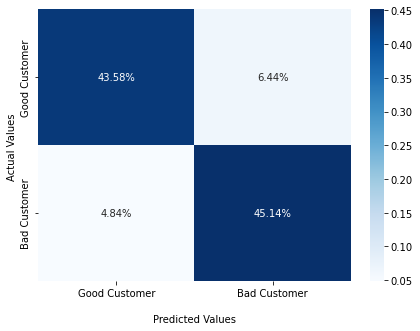

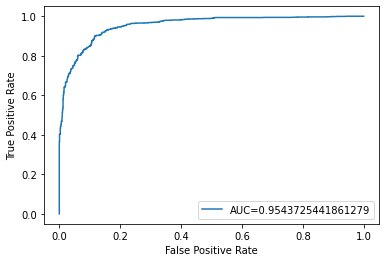

In [88]:
#use RandomForestClassifier
model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

# give precision/recall/f1-score
print(classification_report(y_test, y_predict))

#plot confusion matrix
cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Good Customer','Bad Customer'])
ax.yaxis.set_ticklabels(['Good Customer','Bad Customer'])

plt.show()

#ROC-Curve plot with AUC
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

Accuracy Score is 0.92696
      0     1
0  1114   105
1    73  1145
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1219
           1       0.92      0.94      0.93      1218

    accuracy                           0.93      2437
   macro avg       0.93      0.93      0.93      2437
weighted avg       0.93      0.93      0.93      2437



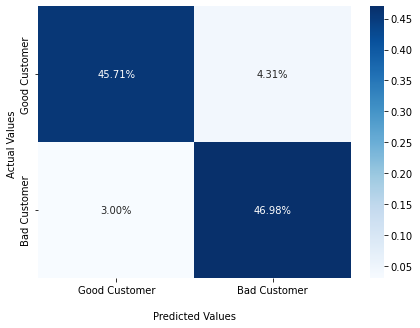

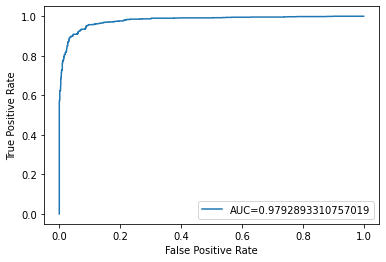

In [89]:
#use LGBMClassifier
model = LGBMClassifier(num_leaves=31,
                       max_depth=8, 
                       learning_rate=0.02,
                       n_estimators=250,
                       subsample = 0.8,
                       colsample_bytree =0.8
                      )

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

# give precision/recall/f1-score
print(classification_report(y_test, y_predict))

#plot confusion matrix
cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Good Customer','Bad Customer'])
ax.yaxis.set_ticklabels(['Good Customer','Bad Customer'])

plt.show()

#ROC-Curve plot with AUC
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

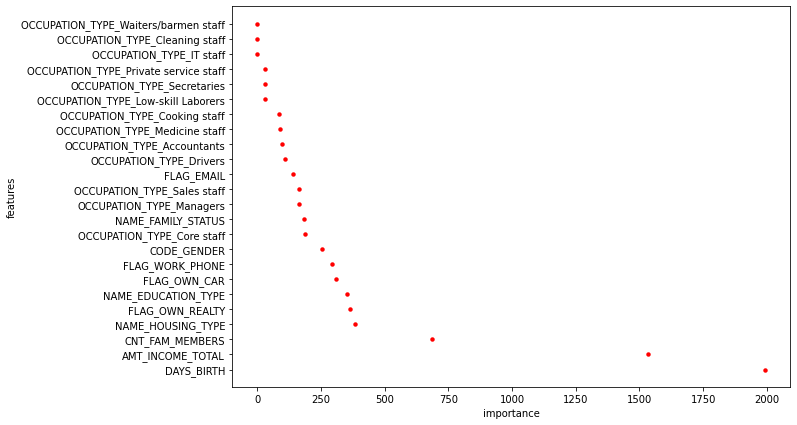

In [90]:
#show important features of LGBMClassifier
plt.figure(figsize=(10,7))
def plot_importance(classifer, x_train, point_size = 25):
    '''plot feature importance'''
    values = sorted(zip(x_train.columns, classifer.feature_importances_), key = lambda x: x[1] * -1)
    imp = pd.DataFrame(values,columns = ["Name", "Score"])
    imp.sort_values(by = 'Score',inplace = True)
    sns.scatterplot(x = 'Score',y='Name', linewidth = 0,
                data = imp,s = point_size, color='red').set(
    xlabel='importance', 
    ylabel='features')
    
plot_importance(model, X_train,20)   



---

